# Predicting Molecular Structure from IR and UV Data: Get Data and Carpentry

In this example, we aim to predict molecular structures using IR and UV spectroscopy data. Our first step is to extract the IR data for compounds from the NIST Chemistry WebBook.

In [6]:
import nistchempy as nist

In [7]:
nist.print_search_parameters()

Units      :   Units for thermodynamic data, "SI" or "CAL" for calorie-based
MatchIso   :   Exactly match the specified isotopes (formula search only)
AllowOther :   Allow elements not specified in formula (formula search only)
AllowExtra :   Allow more atoms of elements in formula than specified (formula search only)
NoIon      :   Exclude ions from the search (formula search only)
cTG        :   Contains gas-phase thermodynamic data
cTC        :   Contains condensed-phase thermodynamic data
cTP        :   Contains phase-change thermodynamic data
cTR        :   Contains reaction thermodynamic data
cIE        :   Contains ion energetics thermodynamic data
cIC        :   Contains ion cluster thermodynamic data
cIR        :   Contains IR data
cTZ        :   Contains THz IR data
cMS        :   Contains MS data
cUV        :   Contains UV/Vis data
cGC        :   Contains gas chromatography data
cES        :   Contains vibrational and electronic energy levels
cDI        :   Contains constant

In [195]:
#For example, to search for nonionic compounds with registered, IR spectrum [[[and UV-vis spectrum]]] data:

search = nist.Search(NoIon=True, AllowOther=False, AllowExtra=False)#, cIR=True, cUV=True)
print(search.parameters)

SearchParameters(Units=SI, NoIon=True)


In [196]:
## NOTE: the nistchempy search flags are perhaps not reliable
## Tried to update nistchempy to latest version and it didn't increase the number of hits

In [197]:
print(search.parameters)

SearchParameters(Units=SI, NoIon=True)


In [200]:
#comment this line and execute to perform the search of NIST database

import pickle
import nistchempy
from tqdm.notebook import tqdm  # Import tqdm notebook for Jupyter-friendly progress bars

# Initialize search and overflow set (to avoid duplicates)
overflows = set()

# Note: this code takes ~10 minutes to run

# Outer loop: Carbons
outer = tqdm(range(1, 20), desc="Outer Loop (Carbons)", unit="step")
for i in outer:
    search.find_compounds(f'C{i}H*O*N*S*Cl*', 'formula')
    overflows.update(search.IDs)  # Add IDs to the set (no duplicates)
    outer.set_postfix({'Compounds Found': len(overflows)})  # Update counter

    # Check if the limit of 400 compounds has been reached
    if len(search.IDs) == 400:
        # Hydrogen loop
        hydrogen = tqdm(range(0, 50), desc=f"Hydrogen Loop (C{i})", leave=False, unit="H-step")
        for j in hydrogen:
            search.find_compounds(f'C{i}H{j}O*N*S*Cl*', 'formula')
            if len(search.IDs) != 0:
                overflows.update(search.IDs)  # Add IDs to the set (no duplicates)
                hydrogen.set_postfix({'Compounds Found': len(overflows)})  # Update counter

                if len(search.IDs) == 400:
                    # Oxygen loop
                    oxygen = tqdm(range(0, 10), desc=f"Oxygen Loop (C{i}H{j})", leave=False, unit="O-step")
                    for k in oxygen:
                        search.find_compounds(f'C{i}H{j}O{k}N*S*Cl*', 'formula')
                        if len(search.IDs) != 0:
                            overflows.update(search.IDs)  # Add IDs to the set (no duplicates)
                            oxygen.set_postfix({'Compounds Found': len(overflows)})  # Update counter

                            if len(search.IDs) == 400:
                                # Nitrogen loop
                                nitrogen = tqdm(range(0, 10), desc=f"Nitrogen Loop (C{i}H{j}O{k})", leave=False, unit="N-step")
                                for m in nitrogen:
                                    search.find_compounds(f'C{i}H{j}O{k}N{m}S*Cl*', 'formula')
                                    overflows.update(search.IDs)  # Add IDs to the set (no duplicates)
                                    nitrogen.set_postfix({'Compounds Found': len(overflows)})  # Update counter

# Print the total number of unique compounds found
print(f"Total unique compounds found: {len(overflows)}")


Outer Loop (Carbons):   0%|          | 0/19 [00:00<?, ?step/s]

Hydrogen Loop (C2):   0%|          | 0/50 [00:00<?, ?H-step/s]

Hydrogen Loop (C3):   0%|          | 0/50 [00:00<?, ?H-step/s]

Hydrogen Loop (C4):   0%|          | 0/50 [00:00<?, ?H-step/s]

Hydrogen Loop (C5):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C5H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C6):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C6H8):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C6H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C6H12):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C6H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C7):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C7H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C7H12):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C7H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C8):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C8H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C8H12):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C8H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C8H16):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C8H18):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C9):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C9H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C9H12):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C9H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C9H16):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C9H18):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C10):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C10H10):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H12):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H16):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H18):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H20):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C10H22):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C11):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C11H14):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C11H20):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C11H22):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C12):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C12H16):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C12H18):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C12H20):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C12H22):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C12H24):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C12H26):   0%|          | 0/10 [00:00<?, ?O-step/s]

Nitrogen Loop (C12H26O0):   0%|          | 0/10 [00:00<?, ?N-step/s]

Hydrogen Loop (C13):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C13H18):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C13H20):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C14):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C14H26):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C15):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C15H22):   0%|          | 0/10 [00:00<?, ?O-step/s]

Oxygen Loop (C15H24):   0%|          | 0/10 [00:00<?, ?O-step/s]

Nitrogen Loop (C15H24O0):   0%|          | 0/10 [00:00<?, ?N-step/s]

Nitrogen Loop (C15H24O1):   0%|          | 0/10 [00:00<?, ?N-step/s]

Oxygen Loop (C15H26):   0%|          | 0/10 [00:00<?, ?O-step/s]

Nitrogen Loop (C15H26O1):   0%|          | 0/10 [00:00<?, ?N-step/s]

Oxygen Loop (C15H28):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C16):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C16H30):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C17):   0%|          | 0/50 [00:00<?, ?H-step/s]

Hydrogen Loop (C18):   0%|          | 0/50 [00:00<?, ?H-step/s]

Oxygen Loop (C18H34):   0%|          | 0/10 [00:00<?, ?O-step/s]

Hydrogen Loop (C19):   0%|          | 0/50 [00:00<?, ?H-step/s]

Total unique compounds found: 68030


In [202]:
import pandas as pd

# Convert the set to a DataFrame
df = pd.DataFrame({'data': list(overflows)})

# Save as Parquet
df.to_parquet('compounds.parquet', index=False)

In [203]:
from collections import Counter

def delete_duplicates(input_list):
    # Count the frequency of each element
    element_counts = Counter(input_list)
    
    # Keep only elements that appear exactly once
    output_list = [item for item in input_list if element_counts[item] == 1]
    
    return output_list

# Example Usage
res = delete_duplicates(overflows)

print("Original List:", len(overflows))
print("List without Duplicates:", len(res))


Original List: 68030
List without Duplicates: 68030


In [204]:
# Optional: Save the results to a Parquet file
import pandas as pd
df.to_parquet('./compounds.parquet')

In [206]:
import pandas as pd

path = './compounds.parquet'
overflows_df = pd.read_parquet(path)


In [207]:
len(overflows_df)

68030

In [208]:
overflows = overflows_df['data']

In [209]:
list(overflows)[0:10]

['C106365',
 'T999923921',
 'C597773',
 'C62183759',
 'C874793',
 'C6376927',
 'C13651144',
 'C91342335',
 'U307144',
 'R34721']

# Step-by-Step Analysis of IR Data Extraction for One Molecule

## Step 1: Extracting IR Spectrum for One Molecule

To manually analyze one molecule, let’s assume we have a molecule name, for example, **"ethanol"**. We can use the following steps to extract and examine the data.

### Select a Molecule

We will use the fourth key 'C107211' as an example:

In [235]:
molecule=res[0]
print(molecule)

C106365


### Retrieve IR Spectrum

We use `nist.Compound(molecule)` to create an object containing information about the molecule. The `.get_spectra('IR')` method allows us to retrieve its IR spectra.

In [236]:
# Create a compound object from the NIST database
X = nist.Compound(molecule)

# Retrieve the IR spectra for ethanol
X.get_spectra('IR')

At this point, **`X.IR`** will contain a list of IR spectra available for this molecule. We can check the number of available spectra by printing:

In [237]:
X

Compound(C106365)

In [238]:
print(len(X.IR))

1


**`len(X.IR)`** returns 2, which means there is one IR spectrum available. Let's examine the first of these. The `X.IR[0]` returns a Spectrum object. We can get the IR data by executing `<object>.jdx_text`

In [239]:
spec = X.IR[0]
print(spec.jdx_text)

##TITLE=Propanoic acid, propyl ester
##JCAMP-DX=4.24
##DATA TYPE=INFRARED SPECTRUM
##ORIGIN=Sadtler Research Labs Under US-EPA Contract
##OWNER=NIST Standard Reference Data Program
Collection (C) 2018 copyright by the U.S. Secretary of Commerce
on behalf of the United States of America. All rights reserved.
##CAS REGISTRY NO=106-36-5
##MOLFORM=C 6 H 12 O 2
##$NIST SOURCE=MSDC-IR
##STATE=gas
##XUNITS=1/CM
##YUNITS=ABSORBANCE
##XFACTOR=1.0
##YFACTOR=0.000104800
##DELTAX=4.0
##FIRSTX=450.0
##LASTX=3966.0
##FIRSTY=0.000000
##MAXX=3966
##MINX=450
##MAXY=1.048
##MINY=0
##NPOINTS=880
##XYDATA=(X++(Y..Y))
450.0 0 437 416 563 562 543 517 569 484 618
490.0 564 618 540 520 513 454 426 475 520 474
530.0 449 463 432 532 472 441 510 458 441 493
570.0 476 489 476 456 520 541 555 537 553 530
610.0 553 537 545 540 525 509 477 504 548 496
650.0 454 439 476 471 482 501 517 458 458 487
690.0 465 510 489 429 431 432 467 486 490 462
730.0 423 457 412 394 481 577 511 553 573 540
770.0 591 558 525 540 539 579

## Step 3: Convert IR Spectrum from JCAMP-DX Format to X, Y Coordinates

Each IR spectrum is stored in `.jdx` format, which is a common format for spectroscopic data. We use the `jdx_to_xy` function to convert it into numerical X and Y data that can be plotted.

### JCAMP File Format

JCAMP (Joint Committee on Atomic and Molecular Physical Data) file format, often referred to as JCAMP-DX, is a standard format used for storing spectroscopic data, such as IR (infrared), NMR, UV/Vis, and mass spectrometry spectra. It was developed to facilitate the exchange of data between different spectroscopic instruments and laboratories, ensuring compatibility across devices and platforms. JCAMP files are generally text-based and contain both metadata and spectral data in a structured format. The metadata provides useful information about the experiment, such as units, sample information, and conditions, while the spectral data is represented as a series of X and Y coordinate pairs, which typically denote wavelength or frequency (X-axis) and absorbance or intensity (Y-axis).

JCAMP files often use the `.jdx` or `.dx` extension. They are readable by both machines and humans, which makes them useful for data sharing in research contexts.

### Code Explanation

The following code converts an IR spectrum in JCAMP-DX format to X, Y coordinate pairs using the `jcamp` Python library by writing the data to a file and then reading it in again:

In [75]:
%pip install jcamp

In [240]:
# Convert IR spectrum to X, Y
import jcamp

def jdx_to_xy(jdx_text):
    with open("Output.txt", "w") as text_file:
        text_file.write(jdx_text)  # Write the JCAMP-DX text to an output file
    with open("Output.txt", "r") as text_file:
        data = jcamp.jcamp_read(text_file)  # Use jcamp_read to parse the file
    return data

JCAMP's code is written to handle file-like string data. You can use Python's `io.StringIO` to simulate a file-like object for the JCAMP data. Here's how you can modify the code to avoid writing to a file:

In [241]:
# Convert IR spectrum to X, Y without writing to a file
# pip install jcamp
import jcamp
import io

def jdx_to_xy(jdx_text):
    # Use StringIO to create a file-like object from the input string
    text_file = io.StringIO(jdx_text)
    
    # Parse the JCAMP data directly from the StringIO object
    data = jcamp.jcamp_read(text_file)
    
    return data

In [242]:
if len(X.IR) > 0:
    # Get the first IR spectrum and convert the .jdx format to xy coordinates
    spec = X.IR[0]
    IRs = jdx_to_xy(spec.jdx_text)

The **`IRs`** object now contains two lists: one for X values (wavenumber) and one for Y values (intensity).

## Step 4: Inspect the Data

Let's take a quick look at the first few data points to understand what we're working with:

In [243]:
print(IRs['x'][:5])  # First 5 X values (wavenumber)
print(IRs['y'][:5])  # First 5 Y values (intensity)

[450. 454. 458. 462. 466.]
[0.        0.0457976 0.0435968 0.0590024 0.0588976]


This gives us a preview of the spectral data:

- **X values** represent the **wavenumber** in cm⁻¹ (common unit for IR spectra).
- **Y values** represent the **intensity** of absorption at each wavenumber.

## Step 5: Plot the IR Spectrum

To better understand the spectrum, we can plot the data using Matplotlib.

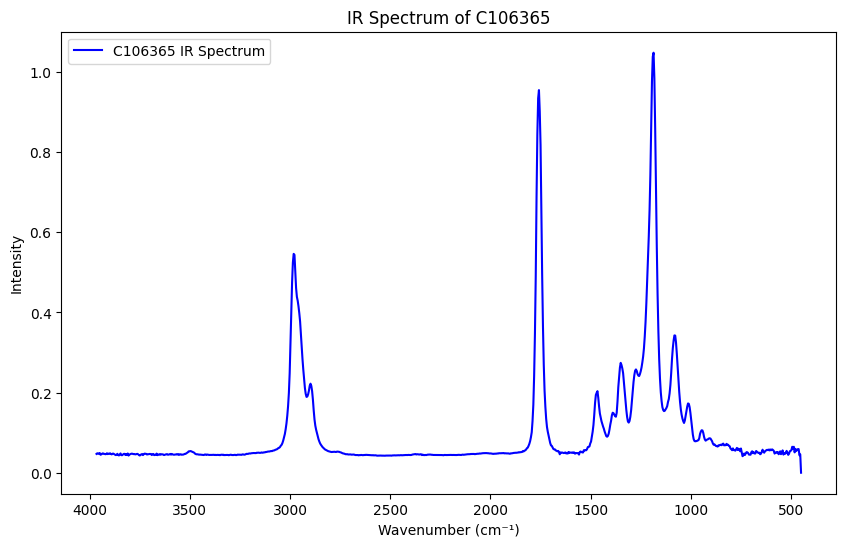

In [244]:
import matplotlib.pyplot as plt

# Plotting the IR spectrum for ethanol
plt.figure(figsize=(10, 6))
plt.plot(IRs['x'], IRs['y'], color='b', label=molecule + ' IR Spectrum')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('IR Spectrum of ' + molecule) 
plt.gca().invert_xaxis()  # IR spectra are usually plotted with the wavenumber decreasing
plt.legend()
plt.show()

### Explanation of the Plot

- The **x-axis** represents the **wavenumber** (in cm⁻¹), which corresponds to the frequency of the IR radiation.
- The **y-axis** represents the **intensity** of absorption, showing how much IR radiation is absorbed by the molecule at each wavenumber.
- The **peaks** in the plot represent different vibrational modes of the molecule's bonds, which helps in identifying functional groups present in the molecule.

## Step 6: Store the Data

Finally, we store the IR spectrum data for the molecule in the dictionary `d_IR` with the molecule name as the key:

In [245]:
# Store the retrieved IR spectra data in the d_IR dictionary
d={} # Create empty dictionary to store data
d[molecule] = IRs #put the JCamp data into the dictionary

In [246]:
d.keys()

dict_keys(['C106365'])

In [247]:
d['C106365']

{'title': 'Propanoic acid, propyl ester',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'origin': 'Sadtler Research Labs Under US-EPA Contract',
 'owner': 'NIST Standard Reference Data Program\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.',
 'cas registry no': '106-36-5',
 'molform': 'C 6 H 12 O 2',
 '$nist source': 'MSDC-IR',
 'state': 'gas',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 0.0001048,
 'deltax': 4.0,
 'firstx': 450.0,
 'lastx': 3966.0,
 'firsty': 0.0,
 'maxx': 3966,
 'minx': 450,
 'maxy': 1.048,
 'miny': 0,
 'npoints': 880,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 450.,  454.,  458.,  462.,  466.,  470.,  474.,  478.,  482.,
         486.,  490.,  494.,  498.,  502.,  506.,  510.,  514.,  518.,
         522.,  526.,  530.,  534.,  538.,  542.,  546.,  550.,  554.,
         558.,  562.,  566.,  570.,  574.,  578.,  582.,  586.,  590.,
        

Now let's use this same process and loop through the list of all of the compounds and save all of the IR data to the `d_IR` dictionary:

In [85]:
# Initialize an empty dictionary to store IR spectra data for each molecule
d_IR = {}

In [87]:
import os.path
from tqdm.notebook import tqdm  # Import tqdm for progress bar support in Jupyter notebooks

## NOTE: THIS CODE TAKES >3 hr TO RUN ##

# Initialize counter for successfully downloaded IR spectra
successful_downloads = 0

# Iterate through each molecule in 'res' using a progress bar from tqdm
progress_bar = tqdm(res, desc="Processing Molecules", unit="molecule")

for molecule in progress_bar:
    
    # Only process the molecule if it's not already in d_IR (to avoid re-processing)
    if molecule not in d_IR:
        attempt = 0  # Initialize attempt counter
        IRs = []  # Reset IR data for each molecule

        while attempt < 1:  # Retry up to 1 times
            try:
                # Create a compound object from the NIST database using the molecule name
                X = nist.Compound(molecule)
                
                # Retrieve the IR spectra for the compound
                X.get_spectra('IR')

                # Check if there is at least one IR spectrum available
                if len(X.IR) > 0:
                    # Get the first IR spectrum and convert the .jdx format to xy coordinates
                    spec = X.IR[0]
                    IRs = jdx_to_xy(spec.jdx_text)

                    # Store the retrieved IR spectra data in the dictionary
                    d_IR[molecule] = IRs

                    # Increment the successful downloads counter
                    successful_downloads += 1
                    
                    # Update the progress bar with the current count of successful downloads
                    progress_bar.set_postfix({'Successful Downloads': successful_downloads})

                    break  # Exit the loop if spectra are successfully retrieved

                # If no spectra found, increment attempt and retry
                attempt += 1

            except Exception as e:
                attempt += 1
                print(f'Error processing {molecule} on attempt {attempt}: {str(e)}')

        # If all attempts fail, log the failure
        if attempt == 100:
            print(f"Failed to retrieve spectra for {molecule} after 100 attempts.")

# Print the total number of successfully downloaded IR spectra
print(f"Total successful downloads: {successful_downloads}")


Processing Molecules:   0%|          | 0/68030 [00:00<?, ?molecule/s]

Error processing C9003274 on attempt 1: could not convert string to float: 'Monomer  56.1063'
Error processing C9004573 on attempt 1: could not convert string to float: 'Monomer  246.3001'
Error processing C28182812 on attempt 1: could not convert string to float: 'Monomer  168.1931'
Error processing U359948 on attempt 1: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
Error processing C25323584 on attempt 1: could not convert string to float: 'Monomer  155.022'
Error processing C25085534 on attempt 1: could not convert string to float: 'Monomer  42.0797'
Error processing C30209804 on attempt 1: could not convert string to float: 'Monomer  109.1799'
Error processing C26062486 on attempt 1: could not convert string to float: 'Monomer  137.1393'
Error processing C87210320 on attempt 1: could not convert string to float: 'Monomer  100.1158'
Error processing C644462 on attempt 1: Bad NIST response, status code: 502
E

In [109]:
len(d_IR)

8285

### Before examining the data, let's save it to a pickle file to save our progress

In [95]:
d_IR['C106365'].keys()

dict_keys(['title', 'jcamp-dx', 'data type', 'origin', 'owner', 'cas registry no', 'molform', '$nist source', 'state', 'xunits', 'yunits', 'xfactor', 'yfactor', 'deltax', 'firstx', 'lastx', 'firsty', 'maxx', 'minx', 'maxy', 'miny', 'npoints', 'xydata', 'end', 'x', 'y'])

In [ ]:
#Save to JSON for portability

In [153]:
import json
import numpy as np

# Recursive function to convert NumPy arrays to lists and tag them
def numpy_to_list_with_metadata(data):
    if isinstance(data, dict):
        return {key: numpy_to_list_with_metadata(value) for key, value in data.items()}
    elif isinstance(data, np.ndarray):
        return {'__np_array__': True, 'data': data.tolist()}
    return data

# Save the dictionary to a JSON file with metadata
path = './IRonly_Data_v09.json'
with open(path, 'w') as f:
    json.dump(numpy_to_list_with_metadata(d_IR), f)

print(f"Data successfully saved to {path} with NumPy metadata.")

Data successfully saved to ./IRonly_Data_v09.json with NumPy metadata.


In [154]:
# Recursive function to restore NumPy arrays using metadata
def restore_numpy_from_metadata(data):
    if isinstance(data, dict):
        if '__np_array__' in data:
            return np.array(data['data'])  # Convert back to NumPy array
        return {key: restore_numpy_from_metadata(value) for key, value in data.items()}
    elif isinstance(data, list):
        # Keep lists as they are if not tagged
        return [restore_numpy_from_metadata(item) for item in data]
    return data

path = './IRonly_Data_v09.json'
# Load the JSON file and restore NumPy arrays
with open(path, 'r') as f:
    loaded_data = json.load(f)

d_IR = restore_numpy_from_metadata(loaded_data)

print("Data successfully restored with original NumPy arrays.")

Data successfully restored with original NumPy arrays.


In [119]:
# Iterate over a copy of the dictionary to avoid modifying it during iteration
for key, value in list(d_IR.items()):
    if value == []:
        del d_IR[key]

# Optionally, print the total number of remaining entries
print(f"Total remaining entries: {len(d_IR)}")

Total remaining entries: 9642


## Now let's make some plots to visualize the data

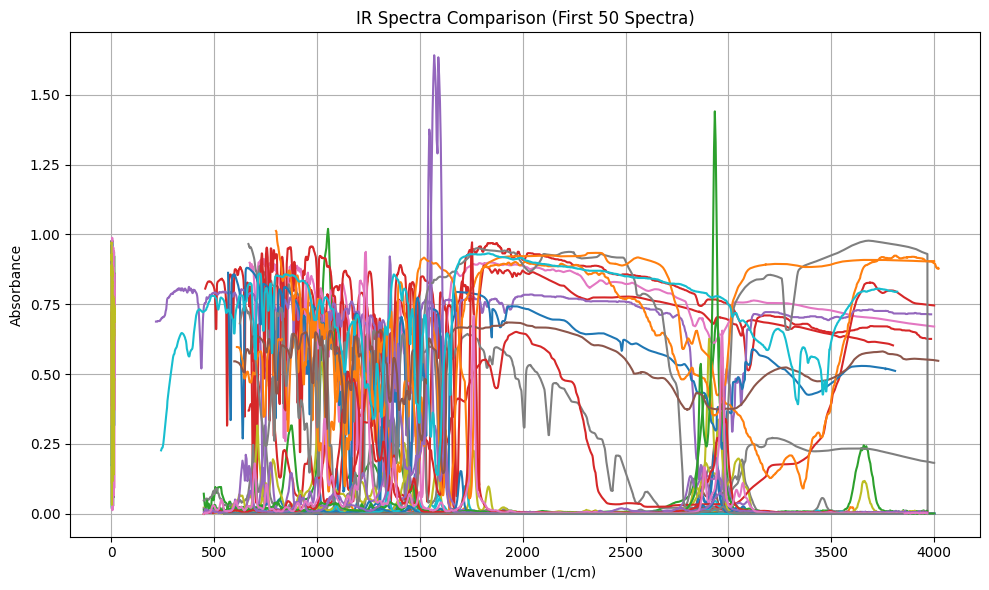

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ir_spectra(data, max_plots=50):
    plt.figure(figsize=(10, 6))
    # Use enumerate to loop over the dictionary and plot up to max_plots entries
    for i, (key, value) in enumerate(data.items()):
        if i >= max_plots:
            break
        plt.plot(value['x'], value['y'], label=value['title'])
    
    plt.xlabel('Wavenumber (1/cm)')
    plt.ylabel('Absorbance')
    plt.title(f'IR Spectra Comparison (First {max_plots} Spectra)')
    #plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), ncol=2, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the first 50 IR spectra
plot_ir_spectra(d_IR)

In [121]:
d_IR['C2760318']

{'title': 'P-METHOXYPROPIONANILIDE',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.',
 'date': 'Not specified, most likely prior to 1970',
 'names': 'N-(4-methoxyphenyl)propanamide',
 'cas registry no': '2760-31-8',
 'molform': 'C10 H13 N O2',
 'source reference': 'COBLENTZ NO. 1691',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob1691',
 'spectrometer/data system': 'Not specified, most likely a prism, grating, or hybrid spectrometer.',
 'state': 'SOLID (MINERAL OIL MULL)',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY',
 'xunits': 'MICROMETERS',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.006853,
 'firstx': 2.027,
 'lastx': 15.9043,
 'firsty': 0.768,
 'maxx': 15.9043,
 'mi

In [122]:
# Let's look at the type of data that we have

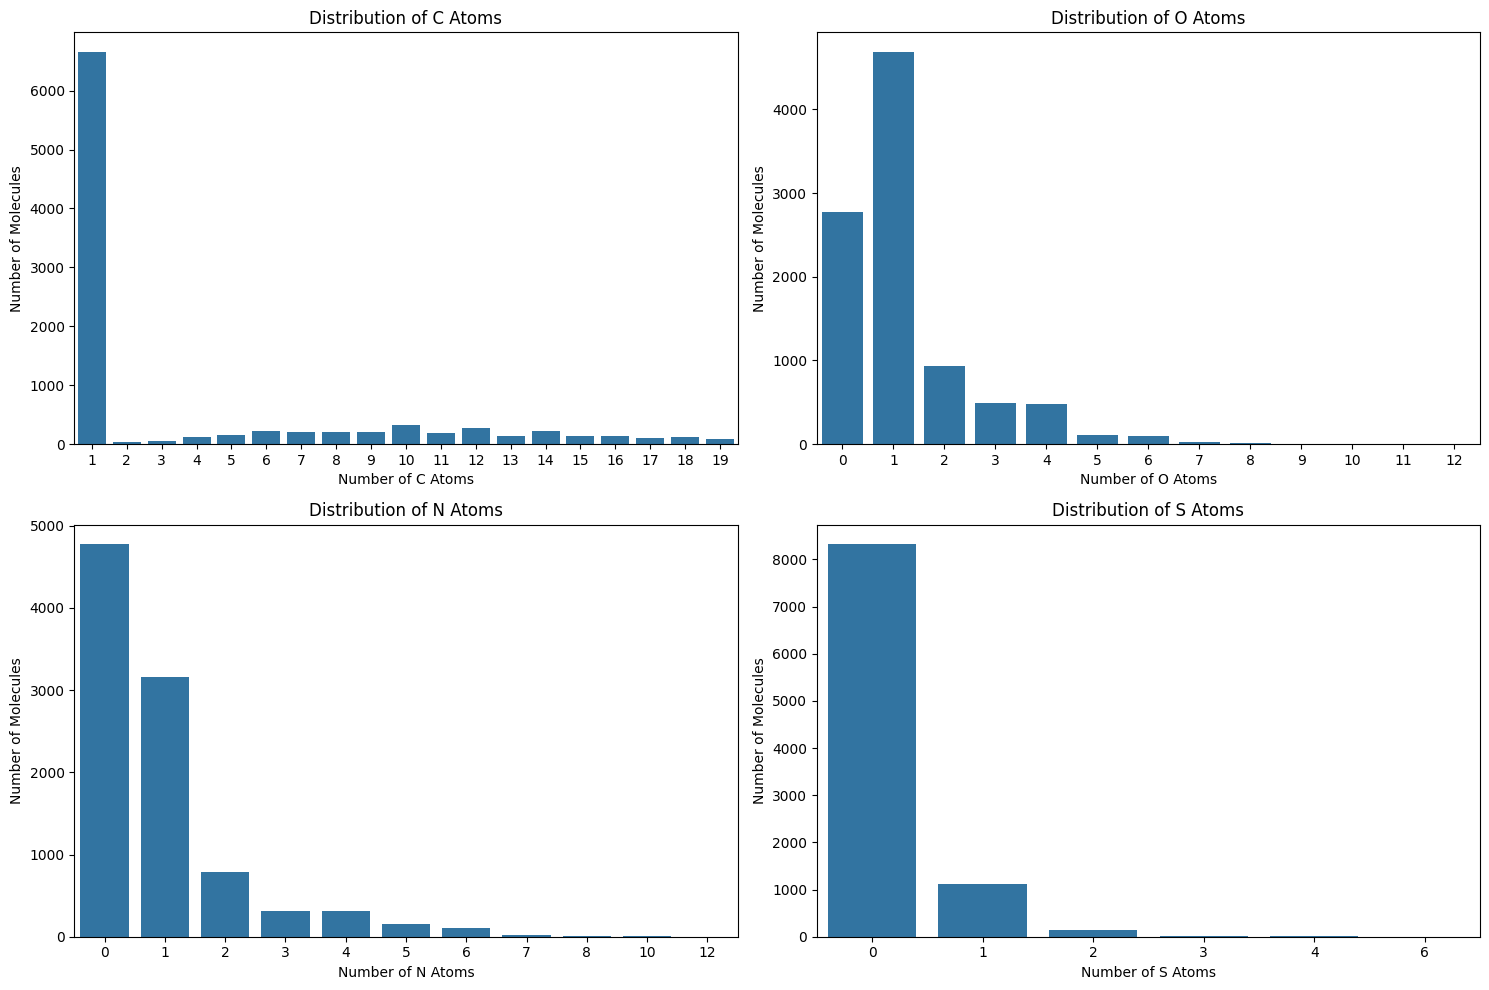

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import re

# Assuming d_IR is a dictionary where the key is an ID and value contains molecular information
# Example structure: d_IR = {1: {'molform': 'C2O1N0S0'}, 2: {'molform': 'C6O2N0S1'}, ...}

# Extract molecular formulas from d_IR
formulas = [data['molform'] for data in d_IR.values()]

# Regex pattern to match elements and their counts (e.g., 'C2', 'O1', 'N3', 'S0')
pattern = r'([CONS])(\d*)'

# Initialize default dictionaries to store the frequency for each element's counts
element_counts = {
    'C': Counter(),
    'O': Counter(),
    'N': Counter(),
    'S': Counter()
}

# Loop through each formula and extract atom counts
for formula in formulas:
    # Initialize counts for relevant elements
    element_count = {'C': 0, 'O': 0, 'N': 0, 'S': 0}

    # Find all element-count pairs in the formula
    matches = re.findall(pattern, formula)

    # Populate the element count dictionary
    for element, count in matches:
        if element in element_count:
            element_count[element] = int(count) if count else 1  # Default to 1 if no number is given

    # Update the Counter for each element
    for element in element_count:
        element_counts[element][element_count[element]] += 1

# Create 1-D plots for each element
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, (element, counts) in enumerate(element_counts.items()):
    ax = axes[i // 2, i % 2]  # Select subplot

    # Extract data for plotting
    x, y = zip(*sorted(counts.items()))  # Sort by x-axis (element counts)

    # Plot data
    sns.barplot(x=list(x), y=list(y), ax=ax)
    ax.set_title(f'Distribution of {element} Atoms')
    ax.set_xlabel(f'Number of {element} Atoms')
    ax.set_ylabel('Number of Molecules')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Issues with the Dataset

There are several challenges with the current dataset:

1. **Replicates**: There seem to be many replicates of the same data.
2. **Empty Data**: Some of the IR spectra datasets are empty (do not contain 'x' and 'y' data)
3. **Length Discrepency**: In some instances the length of the x-data and y-data differ for the same measurement
4. **Frequency Range**: The frequency range of the experimental data is different across measurements.
5. **Intensity Range**: The intensity range of the data also varies.
6. **Units Discrepancy**: The units for the x-axis and y-axis differ between different measurements.


For successful machine learning, the dataset must be uniform. The computer cannot differentiate between transmission and absorbance and cannot manage variable-length data effectively. So, we need to do some **`Data Cleansing/Carpentry`** to make the dataset ML-ready


In [128]:
#First, let's remove the replicate data:
# Initialize an empty set to track seen CAS registry numbers
seen = set()

# Initialize a replicate counter to track the number of replicates
replicate_count = 0

# Iterate through a copy of the dictionary (list(d_IR.items())) to avoid modifying the dictionary while looping
for k, v in list(d_IR.items()):
    try:
        # Convert the 'cas registry no' to a tuple (for immutability) and check if it's already been seen
        cas_registry_no = tuple(v['cas registry no'])
        
        # If the CAS registry number has already been processed, remove the entry from the dictionary
        if cas_registry_no in seen:
            del d_IR[k]
            replicate_count += 1
        else:
            # If it's not seen, add the CAS registry number to the 'seen' set
            seen.add(cas_registry_no)

    except KeyError:
        # Handle missing 'cas registry no'
        #print(f"Missing 'cas registry no' for key: {k}")
        pass
        
    except Exception as e:
        # Handle any other errors
        #print(f"Error processing key {k}: {e}")
        pass

# Optionally, print the total number of replicates
print(f"Total number of replicates found: {replicate_count}")

Total number of replicates found: 0


In [129]:
#Next let's remove any empty datasets:

# Initialize a counter to track the number of empty datasets
empty_count = 0

# Iterate over a copy of the dictionary to remove entries with empty 'x' or 'y' data
for key, value in list(d_IR.items()):
    x_data = value.get('x')
    y_data = value.get('y')

    # Check if 'x' or 'y' is None or if their length is 0
    if x_data is None or y_data is None or len(x_data) == 0 or len(y_data) == 0:
        print(f"Removing entry with empty 'x' or 'y' for key: {key}")
        del d_IR[key]
        empty_count += 1

# Print the total number of empty datasets removed
print(f"Total number of empty datasets removed: {empty_count}")

# Optionally, print the total number of remaining entries
print(f"Total remaining entries: {len(d_IR)}")

Total number of empty datasets removed: 0
Total remaining entries: 9625


In [130]:
d_IR['C20314743']

{'title': 'Dipentyl fumarate',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'origin': 'EPA-IR VAPOR PHASE LIBRARY',
 'owner': 'SRD/NIST\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.',
 'cas registry no': '20314-74-3',
 'molform': 'C14 H24 O4',
 '$nist source': 'MSDC-IR',
 'state': 'gas',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 0.001,
 'deltax': 1.92898,
 'firstx': 549.8,
 'lastx': 4000.7,
 'firsty': 0.7768,
 'maxx': 4000.7,
 'minx': 549.759,
 'maxy': 0.148171,
 'miny': 0,
 'npoints': 1790,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 549.759,  551.688,  553.617, ..., 3996.842, 3998.771, 4000.7  ]),
 'y': array([0.0007768, 0.0007856, 0.0006702, ..., 0.0005249, 0.0005177,
        0.0006568])}

In [131]:
# Next let's remove empty entries and ensure that the x and y data are the same length for each entry

# Initialize a counter to keep track of the total number of times x and y were different lengths
different_length_count = 0

for key in list(d_IR.keys()):
    # Confirm that the list is not empty. Remove empty entries.
    if not d_IR[key]:
        print(f'Empty list at {key}')
        del d_IR[key]
    else:
        try:
            # Confirm that 'x' and 'y' are the same length; if not, truncate to the smaller of the two
            if len(d_IR[key]['x']) != len(d_IR[key]['y']):
                different_length_count += 1
            a = min(len(d_IR[key]['x']), len(d_IR[key]['y']))
            d_IR[key]['x'] = d_IR[key]['x'][:a]
            d_IR[key]['y'] = d_IR[key]['y'][:a]
        except Exception as e:
            print(f"Error processing lengths for key {key}: {e}")
            # Handle unexpected errors gracefully

# Print the total number of times x and y were different lengths
print(f"Total number of times x and y were different lengths: {different_length_count}")

Total number of times x and y were different lengths: 17


In [132]:
# Now let's remove any entries where the data is transmittance data or where the units are in micrometers. 
# Note, we could try to handle these exceptions and modify the data to include it in our training set. 
# For now we will leave this data on the table.

# Initialize counters for 'MICROMETERS' and 'TRANSMITTANCE'
micrometers_count = 0
yunits_transmittance_count = 0

# Count the number of entries with 'xunits' as 'MICROMETERS' and 'yunits' as 'TRANSMITTANCE'
for k, v in d_IR.items():
    if v.get('xunits') == 'MICROMETERS':
        micrometers_count += 1
    if v.get('yunits') == 'TRANSMITTANCE':
        yunits_transmittance_count += 1

# Remove entries with 'xunits' as 'MICROMETERS'
d_IR = {k: v for k, v in d_IR.items() if v.get('xunits') != 'MICROMETERS'}

# Remove entries with 'yunits' as 'TRANSMITTANCE'
d_IR = {k: v for k, v in d_IR.items() if v.get('yunits') != 'TRANSMITTANCE'}

# Print counts for micrometers and transmittance
print(f"Total number of entries with 'xunits' as 'MICROMETERS': {micrometers_count}")
print(f"Total number of entries with 'yunits' as 'TRANSMITTANCE': {yunits_transmittance_count}")

Total number of entries with 'xunits' as 'MICROMETERS': 1639
Total number of entries with 'yunits' as 'TRANSMITTANCE': 3925


In [133]:
print(len(d_IR))

5700


In [134]:
# Now, let's examine the ranges
import pandas as pd

# Initialize a dictionary to store min and max values for 'x' and 'y'
range_database = {
    'x_min': [],
    'x_max': [],
    'y_min': [],
    'y_max': []
}

# Iterate through all entries in the dictionary d_IR
for key, value in d_IR.items():
    try:
        x_data = value['x']
        y_data = value['y']

        # Calculate min and max for 'x'
        x_min = min(x_data)
        x_max = max(x_data)

        # Calculate min and max for 'y'
        y_min = min(y_data)
        y_max = max(y_data)

        # Append values to the range database
        range_database['x_min'].append(x_min)
        range_database['x_max'].append(x_max)
        range_database['y_min'].append(y_min)
        range_database['y_max'].append(y_max)
    
    except KeyError as e:
        print(f"KeyError for key {key}: {e}")
    except Exception as e:
        print(f"Error processing key {key}: {e}")

# Convert the range database to a DataFrame for easier analysis
range_df = pd.DataFrame(range_database)

# Display the range DataFrame
print(range_df.describe())

             x_min        x_max        y_min        y_max
count  5700.000000  5700.000000  5700.000000  5700.000000
mean    513.912220  3956.116553     0.000069     0.414034
std      47.364429   212.110265     0.001113     0.491416
min     399.690000  3846.000000     0.000000     0.003000
25%     450.000000  3846.000000     0.000000     0.041000
50%     549.759000  3966.000000     0.000000     0.155904
75%     550.000000  4000.700000     0.000000     0.702288
max     605.710000  7797.620000     0.029540     3.996980


In [135]:
#Truncate your data to the smallest range that exists in your dataset

In [136]:
import numpy as np
from scipy.interpolate import interp1d

# Initialize x_min and x_max to more suitable starting points
x_min, x_max = float('-inf'), float('inf')

for key, value in d_IR.items():
    try:
        x_data = value['x']

        # Ensure x_data is not empty and does not contain NaN values
        if len(x_data) == 0 or np.isnan(x_data).any():
            print(f"Skipping key {key} because 'x' is empty or contains NaN.")
            continue

        # Update x_min and x_max correctly
        current_x_min = min(x_data)
        current_x_max = max(x_data)

        if current_x_min > x_min:
            x_min = current_x_min

        if current_x_max < x_max:
            x_max = current_x_max

    except KeyError as e:
        print(f"KeyError for key {key}: {e}")
    except Exception as e:
        print(f"Error processing key {key}: {e}")

# Check if x_min and x_max are valid after processing
if x_min == float('-inf') or x_max == float('inf'):
    raise ValueError("Invalid x_min or x_max values. Please check the data for inconsistencies.")

# Create a common 'x' axis across all data
common_x = np.linspace(x_min, x_max, 500)  # Generate 500 points between x_min and x_max

# Iterate through all entries in d_IR to interpolate 'y' to the common 'x' axis and normalize 'y'
for key, value in d_IR.items():
    try:
        x_data = value['x']
        y_data = value['y']

        # Ensure x_data and y_data are not empty and have no NaN values
        if len(x_data) == 0 or len(y_data) == 0 or np.isnan(x_data).any() or np.isnan(y_data).any():
            print(f"Skipping key {key} because 'x' or 'y' is empty or contains NaN.")
            continue

        # Interpolate 'y' values to match the common 'x' axis
        interpolation_function = interp1d(x_data, y_data, kind='linear', bounds_error=False, fill_value=0)
        interpolated_y = interpolation_function(common_x)

        # Normalize 'y' values between 0 and 1
        y_min_value = min(interpolated_y)
        y_max_value = max(interpolated_y)

        # Avoid division by zero if y_max_value == y_min_value
        if y_max_value - y_min_value == 0:
            print(f"Skipping normalization for key {key} because 'y' has no range.")
            continue

        normalized_y = (interpolated_y - y_min_value) / (y_max_value - y_min_value)

        # Update the dictionary with interpolated and normalized data
        d_IR[key]['x'] = common_x.tolist()
        d_IR[key]['y'] = normalized_y.tolist()

    except KeyError as e:
        print(f"KeyError for key {key}: {e}")
    except Exception as e:
        print(f"Error processing key {key}: {e}")


# Replot data to verify updates

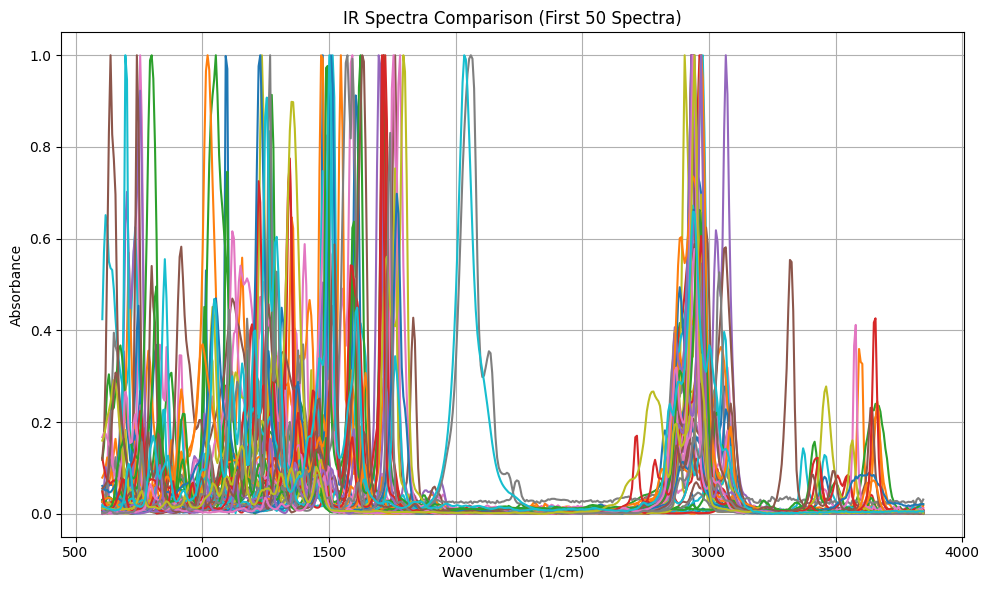

In [137]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ir_spectra(data, max_plots=50):
    plt.figure(figsize=(10, 6))
    # Use enumerate to loop over the dictionary and plot up to max_plots entries
    for i, (key, value) in enumerate(data.items()):
        if i >= max_plots:
            break
        plt.plot(value['x'], value['y'], label=value['title'])
    
    plt.xlabel('Wavenumber (1/cm)')
    plt.ylabel('Absorbance')
    plt.title(f'IR Spectra Comparison (First {max_plots} Spectra)')
    #plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), ncol=2, fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the first 50 IR spectra
plot_ir_spectra(d_IR)

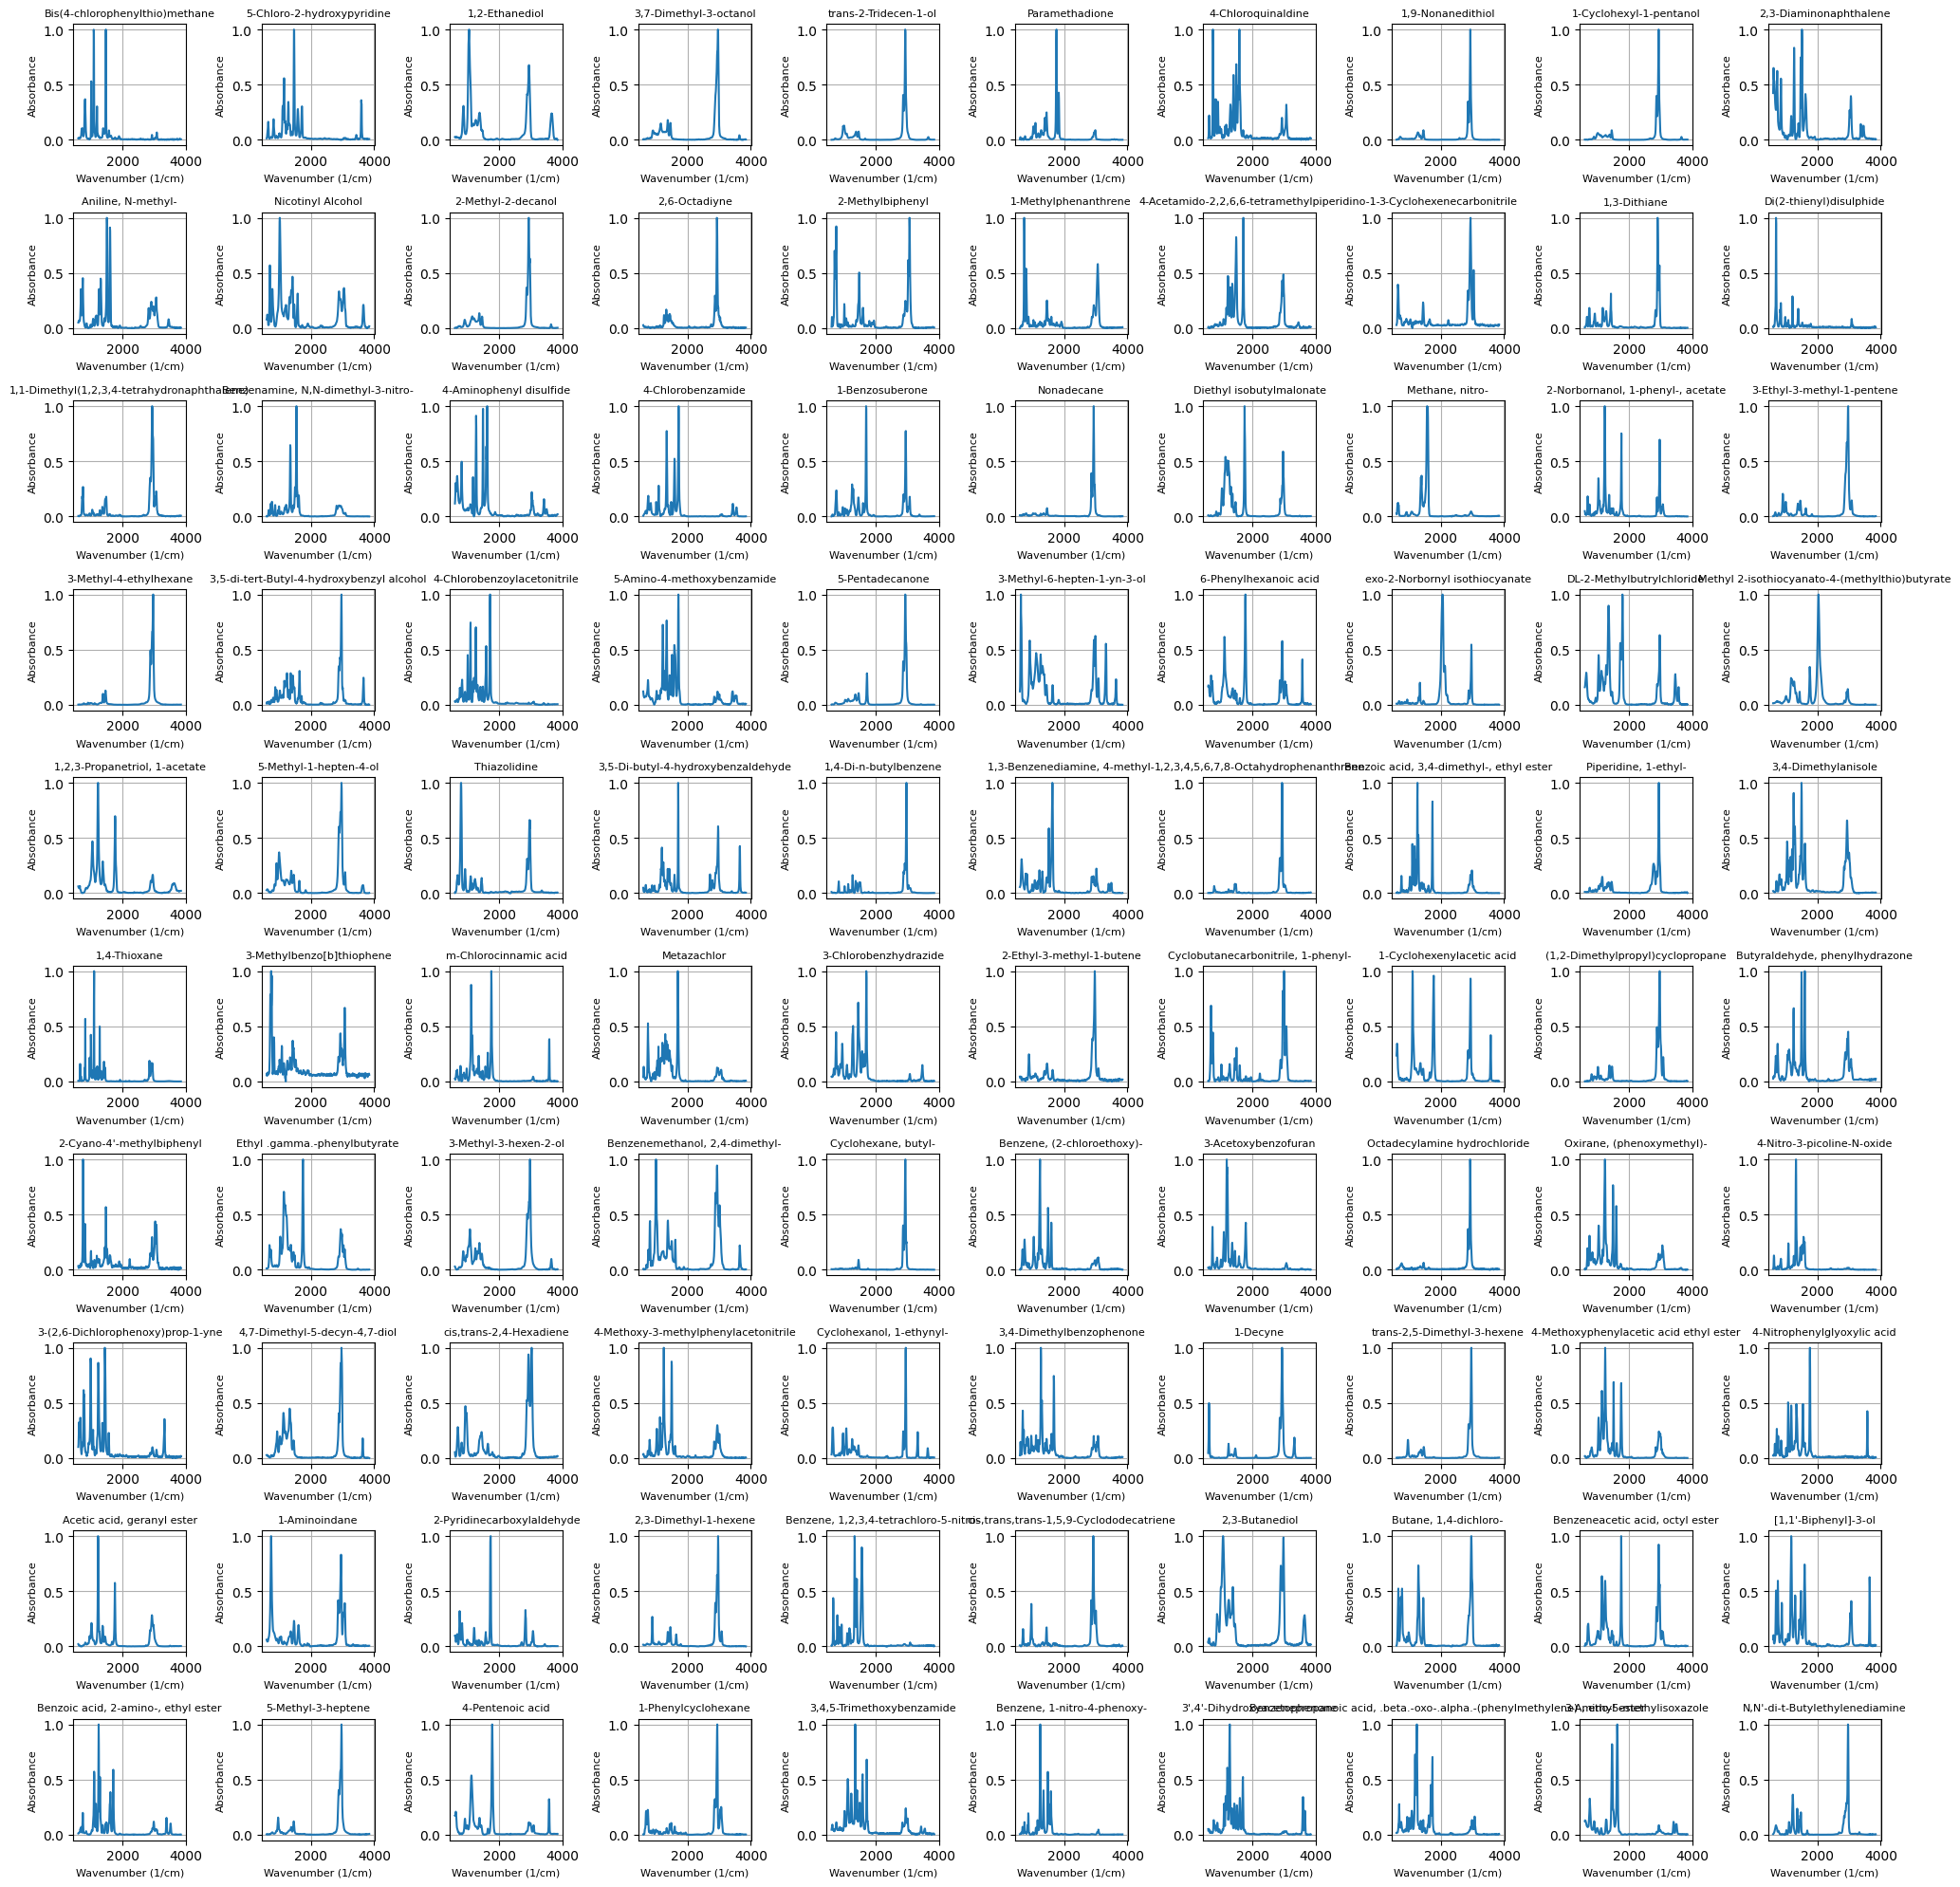

In [138]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ir_spectra(data, max_plots=100):
    # Determine grid size (e.g., 10x10 for 100 plots)
    grid_size = int(np.ceil(np.sqrt(max_plots)))
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    # Plot the data, iterating up to `max_plots` entries
    for i, (key, value) in enumerate(data.items()):
        if i >= max_plots:
            break
        axes[i].plot(value['x'], value['y'])
        axes[i].set_title(value.get('title', f'Spectrum {i+1}'), fontsize=8)
        axes[i].set_xlabel('Wavenumber (1/cm)', fontsize=8)
        axes[i].set_ylabel('Absorbance', fontsize=8)
        axes[i].grid(True)
    
    # Remove any empty subplots (if we have fewer than `max_plots` spectra)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to plot IR spectra
plot_ir_spectra(d_IR)


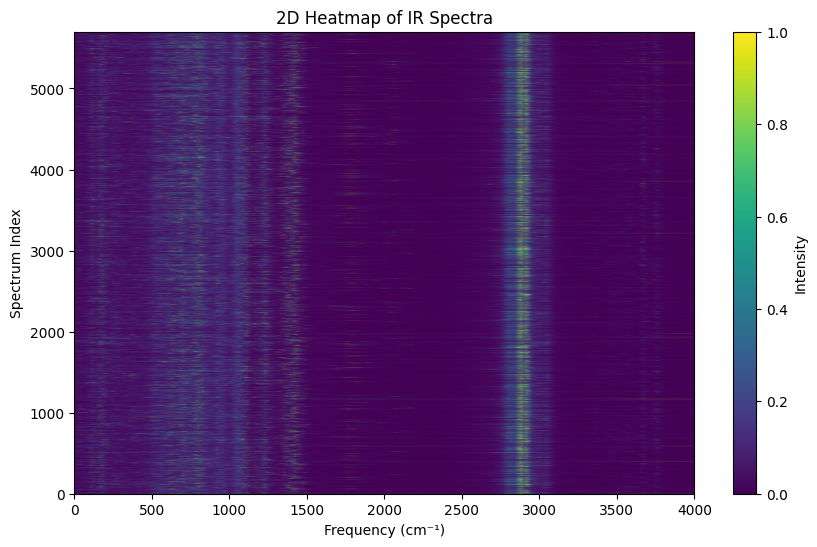

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting frequencies and spectra from the dictionary
spectra_keys = list(d_IR.keys())

# Find the maximum length of the spectra
max_length = max(len(d_IR[key]['y']) for key in spectra_keys)

# Pad the spectra to the maximum length
spectra = []
for key in spectra_keys:
    intensities = d_IR[key]['y']
    padded_intensities = np.pad(intensities, (0, max_length - len(intensities)), 'constant', constant_values=np.nan)
    spectra.append(padded_intensities)

spectra = np.array(spectra)

# Assuming all spectra have the same frequency range, use the longest frequency array
frequencies = np.linspace(0, 4000, max_length)

# Plotting the 2D heatmap
plt.figure(figsize=(10, 6))
plt.imshow(spectra, aspect='auto', cmap='viridis', extent=[frequencies[0], frequencies[-1], 0, spectra.shape[0]])
plt.colorbar(label='Intensity')
plt.xlabel('Frequency (cm⁻¹)')
plt.ylabel('Spectrum Index')
plt.title('2D Heatmap of IR Spectra')
plt.show()

# Convert to Pandas Dataframe for analysis

In [146]:
import pandas as pd

# Initialize an empty list to hold the data
data = []

# Iterate through the dictionary d_IR
for key in d_IR.keys():
    #Confirm that list is not empty. Got empty lists for some entriesy
    if not d_IR[key]:
        print(f'Empty list at {key}')
    else:
        try:
            # Confirm that 'x' and 'y' are the same length; if not, use the smaller of the two. Saw some evidence in some data files
            #that either the x or the y array was twice as long as it was supposed to be. Must be a bug in the jcamp package.
            if len(d_IR[key]['x']) > len(d_IR[key]['y']):
                a = len(d_IR[key]['y'])
            else:
                a = len(d_IR[key]['x'])
        except Exception as e:
            print(f"Error processing lengths for key {key}: {e}")      
        try:
            # Append relevant data to the list
            data.append([
                key, 
                d_IR[key]['cas registry no'], 
                d_IR[key]['title'], 
                d_IR[key]['molform'],
                d_IR[key]['x'],
                d_IR[key]['y']
            ])
        except Exception as e:
            print(f"Error appending data for key {key}: {e}")

In [ ]:
df = pd.DataFrame(data, columns=['NIST_molecule', 'CAS_NO', 'Name', 'molform', 'x', 'y'])

In [ ]:
#Dump dataframe to parquet
import pickle 
import os.path
path = './IR_v09_df_trimmed_500_points.parquet'
df.to_parquet(path)

In [ ]:
import pickle
# Load the dictionary from a pickle file
path = './IR_v09_df_trimmed_500_points.parquet'
df = pd.read_parquet(path)

## Practice

The same workflow used above can be applied to extract UV data from the NIST database.

For this exercise, save a copy of this notebook and modify the beginning of the workflow to work with UV data.

Identify one compound that contains valid UV data and plot its UV spectrum using adapted code from the original IR analysis. You can stop at this point in the workbook - no need to extract all the UV data.
